In [2]:
#importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics 
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Loading data into dataframe

data = pd.read_csv("C:/Users/aditya rahangdale/Downloads/Phishing-URL-Detection-master/Phishing-URL-Detection-master/urldata.csv")
data.head()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,graphicriver.net,0,0,1,1,0,0,0,0,0,1,1,1,0,0,1,0,0
1,ecnavi.jp,0,0,1,1,1,0,0,0,0,1,1,1,0,0,1,0,0
2,hubpages.com,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0
3,extratorrent.cc,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0
4,icicibank.com,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0


In [4]:
#Shape of dataframe

data.shape

(10000, 18)

In [5]:
#Listing the features of the dataset

data.columns

Index(['Domain', 'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth',
       'Redirection', 'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record',
       'Web_Traffic', 'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over',
       'Right_Click', 'Web_Forwards', 'Label'],
      dtype='object')

In [6]:
#Information about the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Domain         10000 non-null  object
 1   Have_IP        10000 non-null  int64 
 2   Have_At        10000 non-null  int64 
 3   URL_Length     10000 non-null  int64 
 4   URL_Depth      10000 non-null  int64 
 5   Redirection    10000 non-null  int64 
 6   https_Domain   10000 non-null  int64 
 7   TinyURL        10000 non-null  int64 
 8   Prefix/Suffix  10000 non-null  int64 
 9   DNS_Record     10000 non-null  int64 
 10  Web_Traffic    10000 non-null  int64 
 11  Domain_Age     10000 non-null  int64 
 12  Domain_End     10000 non-null  int64 
 13  iFrame         10000 non-null  int64 
 14  Mouse_Over     10000 non-null  int64 
 15  Right_Click    10000 non-null  int64 
 16  Web_Forwards   10000 non-null  int64 
 17  Label          10000 non-null  int64 
dtypes: int64(17), object(1)
mem

In [7]:
# nunique value in columns

data.nunique()

Domain           3553
Have_IP             2
Have_At             2
URL_Length          2
URL_Depth          18
Redirection         2
https_Domain        2
TinyURL             2
Prefix/Suffix       2
DNS_Record          2
Web_Traffic         2
Domain_Age          2
Domain_End          2
iFrame              2
Mouse_Over          2
Right_Click         2
Web_Forwards        2
Label               2
dtype: int64

In [8]:
#droping index column

data = data.drop(['Domain'],axis = 1)

In [9]:
#description of dataset

data.describe().T

,count,mean,std,min,25%,50%,75%,max
Have_IP,10000.0,0.0055,0.073961,0.0,0.0,0.0,0.0,1.0
Have_At,10000.0,0.0226,0.148632,0.0,0.0,0.0,0.0,1.0
URL_Length,10000.0,0.7734,0.418653,0.0,1.0,1.0,1.0,1.0
URL_Depth,10000.0,3.0720,2.128631,0.0,2.0,3.0,4.0,20.0
Redirection,10000.0,0.0135,0.115408,0.0,0.0,0.0,0.0,1.0
https_Domain,10000.0,0.0002,0.014141,0.0,0.0,0.0,0.0,1.0
TinyURL,10000.0,0.0903,0.286625,0.0,0.0,0.0,0.0,1.0
Prefix/Suffix,10000.0,0.0932,0.290727,0.0,0.0,0.0,0.0,1.0
DNS_Record,10000.0,0.1008,0.301079,0.0,0.0,0.0,0.0,1.0
Web_Traffic,10000.0,0.8457,0.361254,0.0,1.0,1.0,1.0,1.0


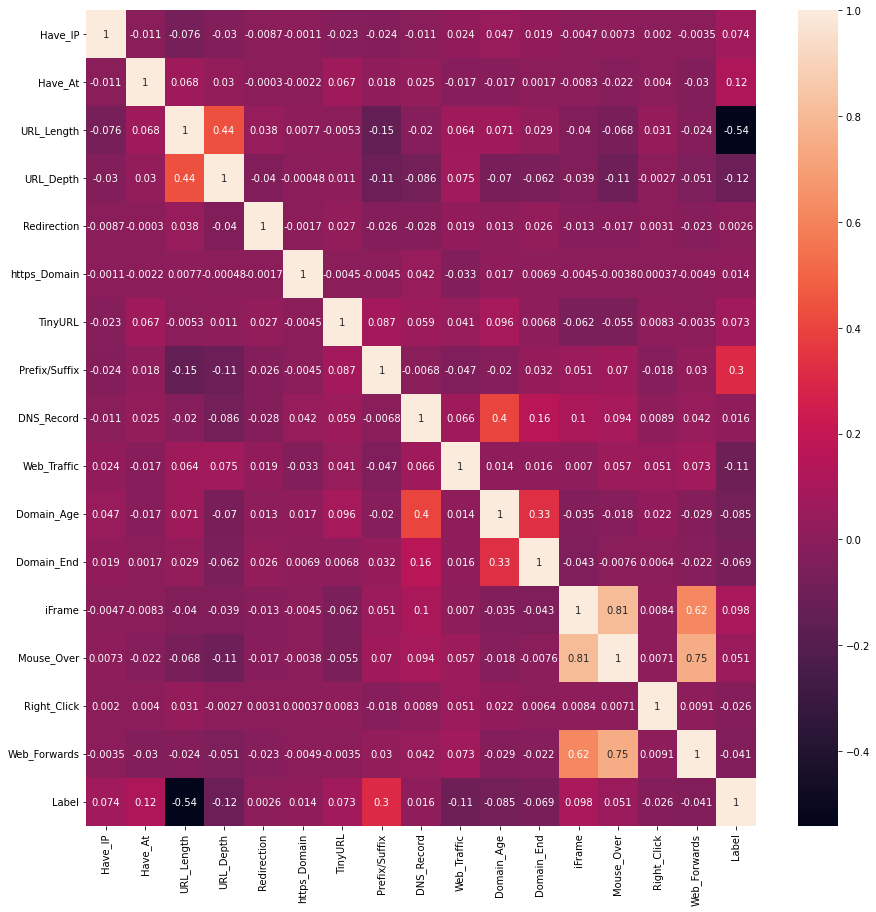

In [10]:
#Correlation heatmap

plt.figure(figsize=(15,15))
sns.heatmap(data.corr(), annot=True)
plt.show()

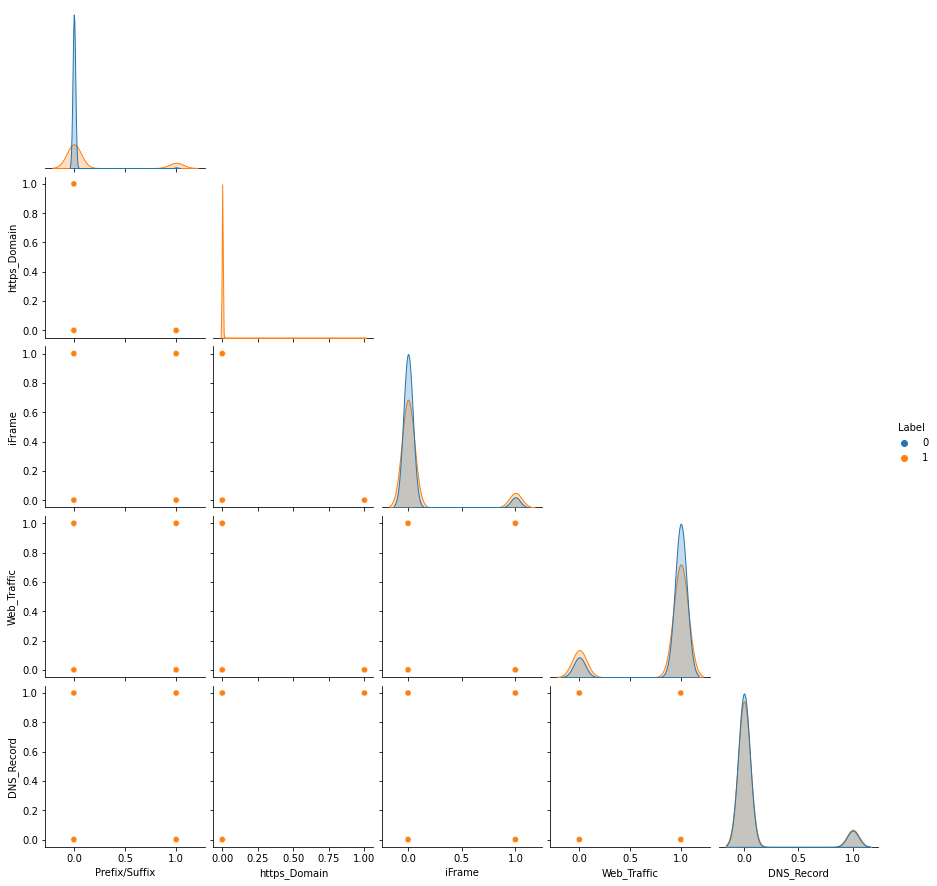

In [11]:
#pairplot for particular features

df = data[['Prefix/Suffix', 'Label', 'https_Domain','iFrame','Web_Traffic','DNS_Record']]
sns.pairplot(data = df,hue="Label",corner=True);


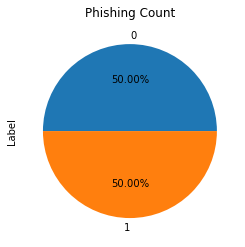

In [12]:
# Phishing Count in pie chart

data['Label'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.title("Phishing Count")
plt.show()

In [13]:
# Splitting the dataset into dependant and independant fetature

X = data.drop(["Label"],axis =1)
y = data["Label"]

In [14]:
# Splitting the dataset into train and test sets: 80-20 split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((8000, 16), (8000,), (2000, 16), (2000,))

In [15]:
# Creating holders to store the model performance results
ML_Model = []
accuracy = []
f1_score = []
recall = []
precision = []

#function to call for storing the results
def storeResults(model, a,b,c,d):
  ML_Model.append(model)
  accuracy.append(round(a, 3))
  f1_score.append(round(b, 3))
  recall.append(round(c, 3))
  precision.append(round(d, 3))

## 5.1. Logistic Regression

Logistic regression predicts the output of a categorical dependent variable. Therefore the outcome must be a categorical or discrete value. Logistic Regression is much similar to the Linear Regression except that how they are used. Linear Regression is used for solving Regression problems, whereas Logistic regression is used for solving the classification problems.

In [16]:
# Linear regression model 
from sklearn.linear_model import LogisticRegression
#from sklearn.pipeline import Pipeline

# instantiate the model
log = LogisticRegression()

# fit the model 
log.fit(X_train,y_train)

LogisticRegression()

In [17]:
#predicting the target value from the model for the samples

y_train_log = log.predict(X_train)
y_test_log = log.predict(X_test)

In [18]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_log = metrics.accuracy_score(y_train,y_train_log)
acc_test_log = metrics.accuracy_score(y_test,y_test_log)
print("Logistic Regression : Accuracy on training Data: {:.3f}".format(acc_train_log))
print("Logistic Regression : Accuracy on test Data: {:.3f}".format(acc_test_log))
print()

f1_score_train_log = metrics.f1_score(y_train,y_train_log)
f1_score_test_log = metrics.f1_score(y_test,y_test_log)
print("Logistic Regression : f1_score on training Data: {:.3f}".format(f1_score_train_log))
print("Logistic Regression : f1_score on test Data: {:.3f}".format(f1_score_test_log))
print()

recall_score_train_log = metrics.recall_score(y_train,y_train_log)
recall_score_test_log = metrics.recall_score(y_test,y_test_log)
print("Logistic Regression : Recall on training Data: {:.3f}".format(recall_score_train_log))
print("Logistic Regression : Recall on test Data: {:.3f}".format(recall_score_test_log))
print()

precision_score_train_log = metrics.precision_score(y_train,y_train_log)
precision_score_test_log = metrics.precision_score(y_test,y_test_log)
print("Logistic Regression : precision on training Data: {:.3f}".format(precision_score_train_log))
print("Logistic Regression : precision on test Data: {:.3f}".format(precision_score_test_log))

Logistic Regression : Accuracy on training Data: 0.807
Logistic Regression : Accuracy on test Data: 0.792

Logistic Regression : f1_score on training Data: 0.776
Logistic Regression : f1_score on test Data: 0.752

Logistic Regression : Recall on training Data: 0.666
Logistic Regression : Recall on test Data: 0.638

Logistic Regression : precision on training Data: 0.929
Logistic Regression : precision on test Data: 0.917


In [19]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_log))

              precision    recall  f1-score   support

           0       0.73      0.94      0.82      1012
           1       0.92      0.64      0.75       988

    accuracy                           0.79      2000
   macro avg       0.82      0.79      0.79      2000
weighted avg       0.82      0.79      0.79      2000



In [20]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Logistic Regression',acc_test_log,f1_score_test_log,
             recall_score_train_log,precision_score_train_log)

## 5.2. K-Nearest Neighbors : Classifier

K-Nearest Neighbour is one of the simplest Machine Learning algorithms based on Supervised Learning technique. K-NN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories.

In [21]:
# K-Nearest Neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

# instantiate the model
knn = KNeighborsClassifier(n_neighbors=1)

# fit the model 
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [22]:
#predicting the target value from the model for the samples
y_train_knn = knn.predict(X_train)
y_test_knn = knn.predict(X_test)

In [23]:
#computing the accuracy,f1_score,Recall,precision of the model performance

acc_train_knn = metrics.accuracy_score(y_train,y_train_knn)
acc_test_knn = metrics.accuracy_score(y_test,y_test_knn)
print("K-Nearest Neighbors : Accuracy on training Data: {:.3f}".format(acc_train_knn))
print("K-Nearest Neighbors : Accuracy on test Data: {:.3f}".format(acc_test_knn))
print()

f1_score_train_knn = metrics.f1_score(y_train,y_train_knn)
f1_score_test_knn = metrics.f1_score(y_test,y_test_knn)
print("K-Nearest Neighbors : f1_score on training Data: {:.3f}".format(f1_score_train_knn))
print("K-Nearest Neighbors : f1_score on test Data: {:.3f}".format(f1_score_test_knn))
print()

recall_score_train_knn = metrics.recall_score(y_train,y_train_knn)
recall_score_test_knn = metrics.recall_score(y_test,y_test_knn)
print("K-Nearest Neighborsn : Recall on training Data: {:.3f}".format(recall_score_train_knn))
print("Logistic Regression : Recall on test Data: {:.3f}".format(recall_score_test_knn))
print()

precision_score_train_knn = metrics.precision_score(y_train,y_train_knn)
precision_score_test_knn = metrics.precision_score(y_test,y_test_knn)
print("K-Nearest Neighbors : precision on training Data: {:.3f}".format(precision_score_train_knn))
print("K-Nearest Neighbors : precision on test Data: {:.3f}".format(precision_score_test_knn))

K-Nearest Neighbors : Accuracy on training Data: 0.787
K-Nearest Neighbors : Accuracy on test Data: 0.757

K-Nearest Neighbors : f1_score on training Data: 0.801
K-Nearest Neighbors : f1_score on test Data: 0.766

K-Nearest Neighborsn : Recall on training Data: 0.856
Logistic Regression : Recall on test Data: 0.803

K-Nearest Neighbors : precision on training Data: 0.753
K-Nearest Neighbors : precision on test Data: 0.732


In [24]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_knn))

              precision    recall  f1-score   support

           0       0.79      0.71      0.75      1012
           1       0.73      0.80      0.77       988

    accuracy                           0.76      2000
   macro avg       0.76      0.76      0.76      2000
weighted avg       0.76      0.76      0.76      2000



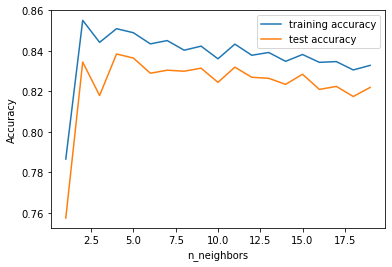

In [25]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 20
depth = range(1,20)
for n in depth:
    knn = KNeighborsClassifier(n_neighbors=n)

    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(knn.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 20
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("n_neighbors")
plt.legend();

In [26]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('K-Nearest Neighbors',acc_test_knn,f1_score_test_knn,
             recall_score_train_knn,precision_score_train_knn)

## 5.3. Support Vector Machine : Classifier

Support Vector Machine or SVM is one of the most popular Supervised Learning algorithms, which is used for Classification as well as Regression problems. The goal of the SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future.

In [27]:
# Support Vector Classifier model 
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'gamma': [0.1],'kernel': ['rbf','linear']}

svc = GridSearchCV(SVC(), param_grid)

# fitting the model for grid search
svc.fit(X_train, y_train)


GridSearchCV(estimator=SVC(),
             param_grid={'gamma': [0.1], 'kernel': ['rbf', 'linear']})

In [28]:
#predicting the target value from the model for the samples
y_train_svc = svc.predict(X_train)
y_test_svc = svc.predict(X_test)

In [29]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_svc = metrics.accuracy_score(y_train,y_train_svc)
acc_test_svc = metrics.accuracy_score(y_test,y_test_svc)
print("Support Vector Machine : Accuracy on training Data: {:.3f}".format(acc_train_svc))
print("Support Vector Machine : Accuracy on test Data: {:.3f}".format(acc_test_svc))
print()

f1_score_train_svc = metrics.f1_score(y_train,y_train_svc)
f1_score_test_svc = metrics.f1_score(y_test,y_test_svc)
print("Support Vector Machine : f1_score on training Data: {:.3f}".format(f1_score_train_svc))
print("Support Vector Machine : f1_score on test Data: {:.3f}".format(f1_score_test_svc))
print()

recall_score_train_svc = metrics.recall_score(y_train,y_train_svc)
recall_score_test_svc = metrics.recall_score(y_test,y_test_svc)
print("Support Vector Machine : Recall on training Data: {:.3f}".format(recall_score_train_svc))
print("Support Vector Machine : Recall on test Data: {:.3f}".format(recall_score_test_svc))
print()

precision_score_train_svc = metrics.precision_score(y_train,y_train_svc)
precision_score_test_svc = metrics.precision_score(y_test,y_test_svc)
print("Support Vector Machine : precision on training Data: {:.3f}".format(precision_score_train_svc))
print("Support Vector Machine : precision on test Data: {:.3f}".format(precision_score_test_svc))

Support Vector Machine : Accuracy on training Data: 0.833
Support Vector Machine : Accuracy on test Data: 0.830

Support Vector Machine : f1_score on training Data: 0.807
Support Vector Machine : f1_score on test Data: 0.797

Support Vector Machine : Recall on training Data: 0.694
Support Vector Machine : Recall on test Data: 0.677

Support Vector Machine : precision on training Data: 0.963
Support Vector Machine : precision on test Data: 0.968


In [30]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_svc))

              precision    recall  f1-score   support

           0       0.76      0.98      0.85      1012
           1       0.97      0.68      0.80       988

    accuracy                           0.83      2000
   macro avg       0.86      0.83      0.82      2000
weighted avg       0.86      0.83      0.83      2000



In [31]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Support Vector Machine',acc_test_svc,f1_score_test_svc,
             recall_score_train_svc,precision_score_train_svc)

## 5.4. Naive Bayes : Classifier

Naïve Bayes algorithm is a supervised learning algorithm, which is based on Bayes theorem and used for solving classification problems.It is mainly used in text, image classification that includes a high-dimensional training dataset. Naïve Bayes Classifier is one of the simple and most effective Classification algorithms which helps in building the fast machine learning models that can make quick predictions.

In [32]:
# Naive Bayes Classifier Model
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline

# instantiate the model
nb=  GaussianNB()

# fit the model 
nb.fit(X_train,y_train)

GaussianNB()

In [33]:
#predicting the target value from the model for the samples
y_train_nb = nb.predict(X_train)
y_test_nb = nb.predict(X_test)

In [34]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_nb = metrics.accuracy_score(y_train,y_train_nb)
acc_test_nb = metrics.accuracy_score(y_test,y_test_nb)
print("Naive Bayes Classifier : Accuracy on training Data: {:.3f}".format(acc_train_nb))
print("Naive Bayes Classifier : Accuracy on test Data: {:.3f}".format(acc_test_nb))
print()

f1_score_train_nb = metrics.f1_score(y_train,y_train_nb)
f1_score_test_nb = metrics.f1_score(y_test,y_test_nb)
print("Naive Bayes Classifier : f1_score on training Data: {:.3f}".format(f1_score_train_nb))
print("Naive Bayes Classifier : f1_score on test Data: {:.3f}".format(f1_score_test_nb))
print()

recall_score_train_nb = metrics.recall_score(y_train,y_train_nb)
recall_score_test_nb = metrics.recall_score(y_test,y_test_nb)
print("Naive Bayes Classifier : Recall on training Data: {:.3f}".format(recall_score_train_nb))
print("Naive Bayes Classifier : Recall on test Data: {:.3f}".format(recall_score_test_nb))
print()

precision_score_train_nb = metrics.precision_score(y_train,y_train_nb)
precision_score_test_nb = metrics.precision_score(y_test,y_test_nb)
print("Naive Bayes Classifier : precision on training Data: {:.3f}".format(precision_score_train_nb))
print("Naive Bayes Classifier : precision on test Data: {:.3f}".format(precision_score_test_nb))

Naive Bayes Classifier : Accuracy on training Data: 0.793
Naive Bayes Classifier : Accuracy on test Data: 0.786

Naive Bayes Classifier : f1_score on training Data: 0.744
Naive Bayes Classifier : f1_score on test Data: 0.725

Naive Bayes Classifier : Recall on training Data: 0.600
Naive Bayes Classifier : Recall on test Data: 0.571

Naive Bayes Classifier : precision on training Data: 0.981
Naive Bayes Classifier : precision on test Data: 0.993


In [35]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_svc))

              precision    recall  f1-score   support

           0       0.76      0.98      0.85      1012
           1       0.97      0.68      0.80       988

    accuracy                           0.83      2000
   macro avg       0.86      0.83      0.82      2000
weighted avg       0.86      0.83      0.83      2000



In [36]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Naive Bayes Classifier',acc_test_nb,f1_score_test_nb,
             recall_score_train_nb,precision_score_train_nb)

## 5.5. Decision Trees : Classifier

Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.

In [37]:
# Decision Tree Classifier model 
from sklearn.tree import DecisionTreeClassifier

# instantiate the model 
tree = DecisionTreeClassifier(max_depth=30)

# fit the model 
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=30)

In [38]:
#predicting the target value from the model for the samples

y_train_tree = tree.predict(X_train)
y_test_tree = tree.predict(X_test)

In [39]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_tree = metrics.accuracy_score(y_train,y_train_tree)
acc_test_tree = metrics.accuracy_score(y_test,y_test_tree)
print("Decision Tree : Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree : Accuracy on test Data: {:.3f}".format(acc_test_tree))
print()

f1_score_train_tree = metrics.f1_score(y_train,y_train_tree)
f1_score_test_tree = metrics.f1_score(y_test,y_test_tree)
print("Decision Tree : f1_score on training Data: {:.3f}".format(f1_score_train_tree))
print("Decision Tree : f1_score on test Data: {:.3f}".format(f1_score_test_tree))
print()

recall_score_train_tree = metrics.recall_score(y_train,y_train_tree)
recall_score_test_tree = metrics.recall_score(y_test,y_test_tree)
print("Decision Tree : Recall on training Data: {:.3f}".format(recall_score_train_tree))
print("Decision Tree : Recall on test Data: {:.3f}".format(recall_score_test_tree))
print()

precision_score_train_tree = metrics.precision_score(y_train,y_train_tree)
precision_score_test_tree = metrics.precision_score(y_test,y_test_tree)
print("Decision Tree : precision on training Data: {:.3f}".format(precision_score_train_tree))
print("Decision Tree : precision on test Data: {:.3f}".format(precision_score_test_tree))

Decision Tree : Accuracy on training Data: 0.869
Decision Tree : Accuracy on test Data: 0.858

Decision Tree : f1_score on training Data: 0.859
Decision Tree : f1_score on test Data: 0.840

Decision Tree : Recall on training Data: 0.795
Decision Tree : Recall on test Data: 0.755

Decision Tree : precision on training Data: 0.933
Decision Tree : precision on test Data: 0.947


In [40]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_tree))

              precision    recall  f1-score   support

           0       0.80      0.96      0.87      1012
           1       0.95      0.76      0.84       988

    accuracy                           0.86      2000
   macro avg       0.87      0.86      0.86      2000
weighted avg       0.87      0.86      0.86      2000



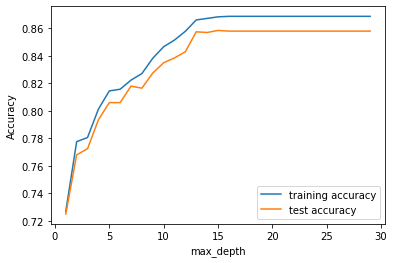

In [41]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 30
depth = range(1,30)
for n in depth:
    tree_test = DecisionTreeClassifier(max_depth=n)

    tree_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(tree_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(tree_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for max_depth from 1 to 30
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("max_depth")
plt.legend();

In [42]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Decision Tree',acc_test_tree,f1_score_test_tree,
             recall_score_train_tree,precision_score_train_tree)

## 5.6. Random Forest : Classifier

Random Forest is a popular machine learning algorithm that belongs to the supervised learning technique. It can be used for both Classification and Regression problems in ML. It is based on the concept of ensemble learning, which is a process of combining multiple classifiers to solve a complex problem and to improve the performance of the model.

In [43]:
# Random Forest Classifier Model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier(n_estimators=10)

# fit the model 
forest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10)

In [44]:
#predicting the target value from the model for the samples
y_train_forest = forest.predict(X_train)
y_test_forest = forest.predict(X_test)

In [45]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_forest = metrics.accuracy_score(y_train,y_train_forest)
acc_test_forest = metrics.accuracy_score(y_test,y_test_forest)
print("Random Forest : Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random Forest : Accuracy on test Data: {:.3f}".format(acc_test_forest))
print()

f1_score_train_forest = metrics.f1_score(y_train,y_train_forest)
f1_score_test_forest = metrics.f1_score(y_test,y_test_forest)
print("Random Forest : f1_score on training Data: {:.3f}".format(f1_score_train_forest))
print("Random Forest : f1_score on test Data: {:.3f}".format(f1_score_test_forest))
print()

recall_score_train_forest = metrics.recall_score(y_train,y_train_forest)
recall_score_test_forest = metrics.recall_score(y_test,y_test_forest)
print("Random Forest : Recall on training Data: {:.3f}".format(recall_score_train_forest))
print("Random Forest : Recall on test Data: {:.3f}".format(recall_score_test_forest))
print()

precision_score_train_forest = metrics.precision_score(y_train,y_train_forest)
precision_score_test_forest = metrics.precision_score(y_test,y_test_tree)
print("Random Forest : precision on training Data: {:.3f}".format(precision_score_train_forest))
print("Random Forest : precision on test Data: {:.3f}".format(precision_score_test_forest))

Random Forest : Accuracy on training Data: 0.868
Random Forest : Accuracy on test Data: 0.860

Random Forest : f1_score on training Data: 0.860
Random Forest : f1_score on test Data: 0.844

Random Forest : Recall on training Data: 0.804
Random Forest : Recall on test Data: 0.764

Random Forest : precision on training Data: 0.924
Random Forest : precision on test Data: 0.947


In [46]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_forest))

              precision    recall  f1-score   support

           0       0.81      0.95      0.87      1012
           1       0.94      0.76      0.84       988

    accuracy                           0.86      2000
   macro avg       0.87      0.86      0.86      2000
weighted avg       0.87      0.86      0.86      2000



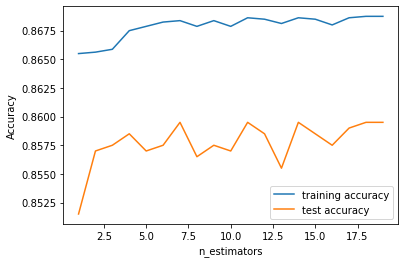

In [47]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 20
depth = range(1,20)
for n in depth:
    forest_test =  RandomForestClassifier(n_estimators=n)

    forest_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(forest_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 20
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("n_estimators")
plt.legend();

In [48]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Random Forest',acc_test_forest,f1_score_test_forest,
             recall_score_train_forest,precision_score_train_forest)

## 5.7.Gradient Boosting Classifier
Gradient boosting classifiers are a group of machine learning algorithms that combine many weak learning models together to create a strong predictive model. Decision trees are usually used when doing gradient boosting. Boosting algorithms play a crucial role in dealing with bias variance trade-off.  Unlike bagging algorithms, which only controls for high variance in a model, boosting controls both the aspects (bias & variance), and is considered to be more effective. 

In [49]:
# Gradient Boosting Classifier Model
from sklearn.ensemble import GradientBoostingClassifier

# instantiate the model
gbc = GradientBoostingClassifier(max_depth=4,learning_rate=0.7)

# fit the model 
gbc.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.7, max_depth=4)

In [50]:
#predicting the target value from the model for the samples
y_train_gbc = gbc.predict(X_train)
y_test_gbc = gbc.predict(X_test)

In [51]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_gbc = metrics.accuracy_score(y_train,y_train_gbc)
acc_test_gbc = metrics.accuracy_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : Accuracy on training Data: {:.3f}".format(acc_train_gbc))
print("Gradient Boosting Classifier : Accuracy on test Data: {:.3f}".format(acc_test_gbc))
print()

f1_score_train_gbc = metrics.f1_score(y_train,y_train_gbc)
f1_score_test_gbc = metrics.f1_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : f1_score on training Data: {:.3f}".format(f1_score_train_gbc))
print("Gradient Boosting Classifier : f1_score on test Data: {:.3f}".format(f1_score_test_gbc))
print()

recall_score_train_gbc = metrics.recall_score(y_train,y_train_gbc)
recall_score_test_gbc =  metrics.recall_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : Recall on training Data: {:.3f}".format(recall_score_train_gbc))
print("Gradient Boosting Classifier : Recall on test Data: {:.3f}".format(recall_score_test_gbc))
print()

precision_score_train_gbc = metrics.precision_score(y_train,y_train_gbc)
precision_score_test_gbc = metrics.precision_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : precision on training Data: {:.3f}".format(precision_score_train_gbc))
print("Gradient Boosting Classifier : precision on test Data: {:.3f}".format(precision_score_test_gbc))

Gradient Boosting Classifier : Accuracy on training Data: 0.868
Gradient Boosting Classifier : Accuracy on test Data: 0.856

Gradient Boosting Classifier : f1_score on training Data: 0.856
Gradient Boosting Classifier : f1_score on test Data: 0.835

Gradient Boosting Classifier : Recall on training Data: 0.781
Gradient Boosting Classifier : Recall on test Data: 0.740

Gradient Boosting Classifier : precision on training Data: 0.948
Gradient Boosting Classifier : precision on test Data: 0.958


In [52]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_gbc))

              precision    recall  f1-score   support

           0       0.79      0.97      0.87      1012
           1       0.96      0.74      0.83       988

    accuracy                           0.86      2000
   macro avg       0.88      0.85      0.85      2000
weighted avg       0.87      0.86      0.85      2000



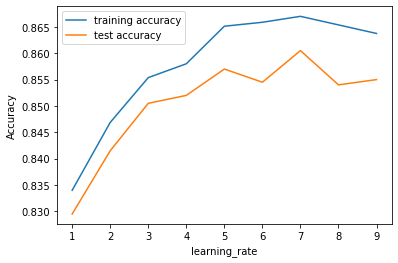

In [53]:
training_accuracy = []
test_accuracy = []
# try learning_rate from 0.1 to 0.9
depth = range(1,10)
for n in depth:
    forest_test =  GradientBoostingClassifier(learning_rate = n*0.1)

    forest_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(forest_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 50
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("learning_rate")
plt.legend();

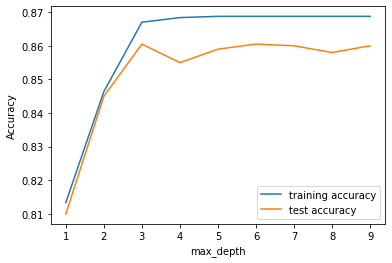

In [54]:
training_accuracy = []
test_accuracy = []
# try learning_rate from 0.1 to 0.9
depth = range(1,10,1)
for n in depth:
    forest_test =  GradientBoostingClassifier(max_depth=n,learning_rate = 0.7)

    forest_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(forest_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 50
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("max_depth")
plt.legend();

In [55]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Gradient Boosting Classifier',acc_test_gbc,f1_score_test_gbc,
             recall_score_train_gbc,precision_score_train_gbc)

## 5.8. CatBoost Classifier

CatBoost is a recently open-sourced machine learning algorithm from Yandex. It can easily integrate with deep learning frameworks like Google’s TensorFlow and Apple’s Core ML. It can work with diverse data types to help solve a wide range of problems that businesses face today.

In [56]:
#  catboost Classifier Model
from catboost import CatBoostClassifier

# instantiate the model
cat = CatBoostClassifier(learning_rate  = 0.1)

# fit the model 
cat.fit(X_train,y_train)

ModuleNotFoundError: No module named 'catboost'

In [57]:
#predicting the target value from the model for the samples
y_train_cat = cat.predict(X_train)
y_test_cat = cat.predict(X_test)


NameError: name 'cat' is not defined

In [58]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_cat  = metrics.accuracy_score(y_train,y_train_cat)
acc_test_cat = metrics.accuracy_score(y_test,y_test_cat)
print("CatBoost Classifier : Accuracy on training Data: {:.3f}".format(acc_train_cat))
print("CatBoost Classifier : Accuracy on test Data: {:.3f}".format(acc_test_cat))
print()

f1_score_train_cat = metrics.f1_score(y_train,y_train_cat)
f1_score_test_cat = metrics.f1_score(y_test,y_test_cat)
print("CatBoost Classifier : f1_score on training Data: {:.3f}".format(f1_score_train_cat))
print("CatBoost Classifier : f1_score on test Data: {:.3f}".format(f1_score_test_cat))
print()

recall_score_train_cat = metrics.recall_score(y_train,y_train_cat)
recall_score_test_cat = metrics.recall_score(y_test,y_test_cat)
print("CatBoost Classifier : Recall on training Data: {:.3f}".format(recall_score_train_cat))
print("CatBoost Classifier : Recall on test Data: {:.3f}".format(recall_score_test_cat))
print()

precision_score_train_cat = metrics.precision_score(y_train,y_train_cat)
precision_score_test_cat = metrics.precision_score(y_test,y_test_cat)
print("CatBoost Classifier : precision on training Data: {:.3f}".format(precision_score_train_cat))
print("CatBoost Classifier : precision on test Data: {:.3f}".format(precision_score_test_cat))

NameError: name 'y_train_cat' is not defined

In [ ]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_cat))

              precision    recall  f1-score   support

           0       0.80      0.96      0.87      1012
           1       0.95      0.75      0.84       988

    accuracy                           0.86      2000
   macro avg       0.87      0.86      0.86      2000
weighted avg       0.87      0.86      0.86      2000



In [ ]:
training_accuracy = []
test_accuracy = []
# try learning_rate from 0.1 to 0.9
depth = range(1,10)
for n in depth:
    forest_test =  CatBoostClassifier(learning_rate = n*0.1)

    forest_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(forest_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(X_test, y_test))
    

0:	learn: 0.5971984	total: 4.03ms	remaining: 4.02s
1:	learn: 0.5364364	total: 9.87ms	remaining: 4.92s
2:	learn: 0.4971151	total: 14.2ms	remaining: 4.71s
3:	learn: 0.4702080	total: 19.2ms	remaining: 4.78s
4:	learn: 0.4528179	total: 22.3ms	remaining: 4.44s
5:	learn: 0.4377866	total: 27.8ms	remaining: 4.61s
6:	learn: 0.4281008	total: 32.4ms	remaining: 4.6s
7:	learn: 0.4198177	total: 37.4ms	remaining: 4.64s
8:	learn: 0.4156416	total: 40.9ms	remaining: 4.5s
9:	learn: 0.4103670	total: 44.9ms	remaining: 4.44s
10:	learn: 0.4041641	total: 49.6ms	remaining: 4.46s
11:	learn: 0.4004349	total: 53.3ms	remaining: 4.39s
12:	learn: 0.3965307	total: 59.7ms	remaining: 4.53s
13:	learn: 0.3933234	total: 64.1ms	remaining: 4.51s
14:	learn: 0.3886191	total: 68ms	remaining: 4.46s
15:	learn: 0.3860516	total: 71.6ms	remaining: 4.4s
16:	learn: 0.3838551	total: 75.1ms	remaining: 4.34s
17:	learn: 0.3819184	total: 78.4ms	remaining: 4.28s
18:	learn: 0.3786198	total: 82.1ms	remaining: 4.24s
19:	learn: 0.3768259	total:

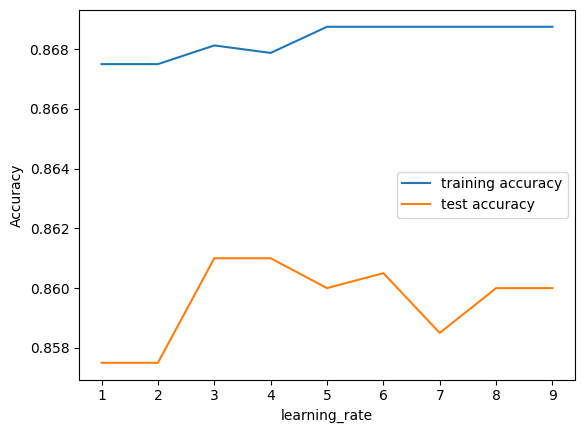

In [ ]:

#plotting the training & testing accuracy for n_estimators from 1 to 50
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("learning_rate")
plt.legend();

In [ ]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('CatBoost Classifier',acc_test_cat,f1_score_test_cat,
             recall_score_train_cat,precision_score_train_cat)

## 5.9. XGBoost Classifier

XGBoost is an implementation of gradient boosted decision trees designed for speed and performance that is dominative competitive machine learning. In this post you will discover how you can install and create your first XGBoost model in Python

In [ ]:
#  XGBoost Classifier Model
from xgboost import XGBClassifier

# instantiate the model
xgb = XGBClassifier()

# fit the model 
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [ ]:
#predicting the target value from the model for the samples
y_train_xgb = xgb.predict(X_train)
y_test_xgb = xgb.predict(X_test)

In [ ]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_xgb = metrics.accuracy_score(y_train,y_train_xgb)
acc_test_xgb = metrics.accuracy_score(y_test,y_test_xgb)
print("XGBoost Classifier : Accuracy on training Data: {:.3f}".format(acc_train_xgb))
print("XGBoost Classifier : Accuracy on test Data: {:.3f}".format(acc_test_xgb))
print()

f1_score_train_xgb = metrics.f1_score(y_train,y_train_xgb)
f1_score_test_xgb = metrics.f1_score(y_test,y_test_xgb)
print("XGBoost Classifier : f1_score on training Data: {:.3f}".format(f1_score_train_xgb))
print("XGBoost Classifier : f1_score on test Data: {:.3f}".format(f1_score_test_xgb))
print()

recall_score_train_xgb = metrics.recall_score(y_train,y_train_xgb)
recall_score_test_xgb = metrics.recall_score(y_test,y_test_xgb)
print("XGBoost Classifier : Recall on training Data: {:.3f}".format(recall_score_train_xgb))
print("XGBoost Classifier : Recall on test Data: {:.3f}".format(recall_score_train_xgb))
print()

precision_score_train_xgb = metrics.precision_score(y_train,y_train_xgb)
precision_score_test_xgb = metrics.precision_score(y_test,y_test_xgb)
print("XGBoost Classifier : precision on training Data: {:.3f}".format(precision_score_train_xgb))
print("XGBoost Classifier : precision on test Data: {:.3f}".format(precision_score_train_xgb))

XGBoost Classifier : Accuracy on training Data: 0.866
XGBoost Classifier : Accuracy on test Data: 0.856

XGBoost Classifier : f1_score on training Data: 0.854
XGBoost Classifier : f1_score on test Data: 0.836

XGBoost Classifier : Recall on training Data: 0.782
XGBoost Classifier : Recall on test Data: 0.782

XGBoost Classifier : precision on training Data: 0.941
XGBoost Classifier : precision on test Data: 0.941


In [ ]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('XGBoost Classifier',acc_test_xgb,f1_score_test_xgb,
             recall_score_train_xgb,precision_score_train_xgb)

## 5.10. Multi-layer Perceptron classifier

MLPClassifier stands for Multi-layer Perceptron classifier which in the name itself connects to a Neural Network. Unlike other classification algorithms such as Support Vectors or Naive Bayes Classifier, MLPClassifier relies on an underlying Neural Network to perform the task of classification.


In [ ]:
# Multi-layer Perceptron Classifier Model
from sklearn.neural_network import MLPClassifier

# instantiate the model
mlp = MLPClassifier()
#mlp = GridSearchCV(mlpc, parameter_space)

# fit the model 
mlp.fit(X_train,y_train)

MLPClassifier()

In [ ]:
#predicting the target value from the model for the samples
y_train_mlp = mlp.predict(X_train)
y_test_mlp = mlp.predict(X_test)

In [ ]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_mlp  = metrics.accuracy_score(y_train,y_train_mlp)
acc_test_mlp = metrics.accuracy_score(y_test,y_test_mlp)
print("Multi-layer Perceptron : Accuracy on training Data: {:.3f}".format(acc_train_mlp))
print("Multi-layer Perceptron : Accuracy on test Data: {:.3f}".format(acc_test_mlp))
print()

f1_score_train_mlp = metrics.f1_score(y_train,y_train_mlp)
f1_score_test_mlp = metrics.f1_score(y_test,y_test_mlp)
print("Multi-layer Perceptron : f1_score on training Data: {:.3f}".format(f1_score_train_mlp))
print("Multi-layer Perceptron : f1_score on test Data: {:.3f}".format(f1_score_train_mlp))
print()

recall_score_train_mlp = metrics.recall_score(y_train,y_train_mlp)
recall_score_test_mlp = metrics.recall_score(y_test,y_test_mlp)
print("Multi-layer Perceptron : Recall on training Data: {:.3f}".format(recall_score_train_mlp))
print("Multi-layer Perceptron : Recall on test Data: {:.3f}".format(recall_score_test_mlp))
print()

precision_score_train_mlp = metrics.precision_score(y_train,y_train_mlp)
precision_score_test_mlp = metrics.precision_score(y_test,y_test_mlp)
print("Multi-layer Perceptron : precision on training Data: {:.3f}".format(precision_score_train_mlp))
print("Multi-layer Perceptron : precision on test Data: {:.3f}".format(precision_score_test_mlp))

Multi-layer Perceptron : Accuracy on training Data: 0.852
Multi-layer Perceptron : Accuracy on test Data: 0.845

Multi-layer Perceptron : f1_score on training Data: 0.833
Multi-layer Perceptron : f1_score on test Data: 0.833

Multi-layer Perceptron : Recall on training Data: 0.737
Multi-layer Perceptron : Recall on test Data: 0.706

Multi-layer Perceptron : precision on training Data: 0.958
Multi-layer Perceptron : precision on test Data: 0.971


In [ ]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Multi-layer Perceptron',acc_test_mlp,f1_score_test_mlp,
             recall_score_train_mlp,precision_score_train_mlp)

## 6. Comparision of Models
To compare the models performance, a dataframe is created. The columns of this dataframe are the lists created to store the results of the model.

In [ ]:
#creating dataframe
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'Accuracy' : accuracy,
                        'f1_score' : f1_score,
                        'Recall'   : recall,
                        'Precision': precision,
                      })

In [ ]:
# dispalying total result
result

,ML Model,Accuracy,f1_score,Recall,Precision
0,Logistic Regression,0.792,0.752,0.666,0.929
1,K-Nearest Neighbors,0.758,0.766,0.856,0.753
2,Support Vector Machine,0.830,0.797,0.694,0.963
3,Naive Bayes Classifier,0.786,0.725,0.600,0.981
4,Decision Tree,0.858,0.840,0.795,0.933
5,Random Forest,0.860,0.844,0.797,0.930
6,Gradient Boosting Classifier,0.855,0.834,0.781,0.948
7,CatBoost Classifier,0.858,0.839,0.792,0.934
8,XGBoost Classifier,0.856,0.836,0.782,0.941
9,Multi-layer Perceptron,0.844,0.818,0.737,0.958


In [ ]:
#Sorting the datafram on accuracy
sorted_result=result.sort_values(by=['Accuracy', 'f1_score'],ascending=False).reset_index(drop=True)

In [ ]:
# dispalying total result
sorted_result

,ML Model,Accuracy,f1_score,Recall,Precision
0,Random Forest,0.860,0.844,0.797,0.930
1,Decision Tree,0.858,0.840,0.795,0.933
2,CatBoost Classifier,0.858,0.839,0.792,0.934
3,XGBoost Classifier,0.856,0.836,0.782,0.941
4,Gradient Boosting Classifier,0.855,0.834,0.781,0.948
5,Multi-layer Perceptron,0.844,0.818,0.737,0.958
6,Support Vector Machine,0.830,0.797,0.694,0.963
7,Logistic Regression,0.792,0.752,0.666,0.929
8,Naive Bayes Classifier,0.786,0.725,0.600,0.981
9,K-Nearest Neighbors,0.758,0.766,0.856,0.753


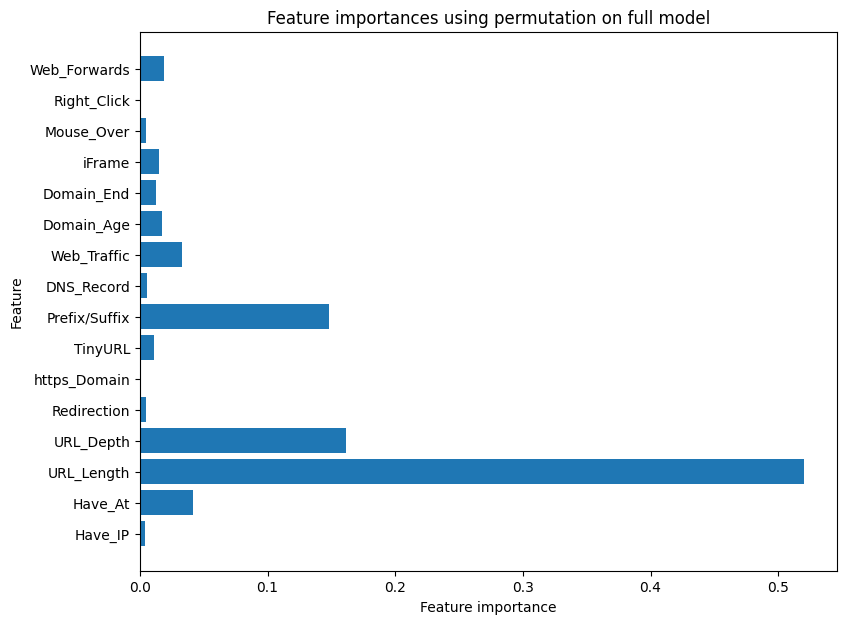

In [ ]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), gbc.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.title("Feature importances using permutation on full model")
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()